In [1]:
# Install PGBM. 
%pip install pgbm
from pgbm import PGBMRegressor

Note: you may need to restart the kernel to use updated packages.
Using C:\Users\ospra\AppData\Local\torch_extensions\torch_extensions\Cache\py38_cu113 as PyTorch extensions root...
Detected CUDA files, patching ldflags
Emitting ninja build file C:\Users\ospra\AppData\Local\torch_extensions\torch_extensions\Cache\py38_cu113\split_decision\build.ninja...
Building extension module split_decision...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)
Loading extension module split_decision...


In [2]:
#%% Load other packages
import torch
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

In [3]:
#%% Load data
X, y = fetch_california_housing(return_X_y=True)

In [4]:
#%% Train pgbm
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
# Train on set 
model = PGBMRegressor(device='gpu')  
model.fit(X_train, y_train)

Training on GPU
Estimator 0/100, Train metric: 1.0819
Estimator 1/100, Train metric: 1.0184
Estimator 2/100, Train metric: 0.9621
Estimator 3/100, Train metric: 0.9131
Estimator 4/100, Train metric: 0.8707
Estimator 5/100, Train metric: 0.8327
Estimator 6/100, Train metric: 0.7988
Estimator 7/100, Train metric: 0.7700
Estimator 8/100, Train metric: 0.7438
Estimator 9/100, Train metric: 0.7213
Estimator 10/100, Train metric: 0.7010
Estimator 11/100, Train metric: 0.6842
Estimator 12/100, Train metric: 0.6680
Estimator 13/100, Train metric: 0.6529
Estimator 14/100, Train metric: 0.6398
Estimator 15/100, Train metric: 0.6283
Estimator 16/100, Train metric: 0.6155
Estimator 17/100, Train metric: 0.6055
Estimator 18/100, Train metric: 0.5981
Estimator 19/100, Train metric: 0.5906
Estimator 20/100, Train metric: 0.5821
Estimator 21/100, Train metric: 0.5733
Estimator 22/100, Train metric: 0.5653
Estimator 23/100, Train metric: 0.5585
Estimator 24/100, Train metric: 0.5514
Estimator 25/100, T

PGBMRegressor(bagging_fraction=1, checkpoint=False, derivatives='exact',
              device='gpu', distribution='normal', feature_fraction=1,
              gpu_device_id=0, init_model=None, learning_rate=0.1, max_bin=256,
              max_leaves=32, metric='rmse', min_data_in_leaf=3,
              min_split_gain=0.0, monotone_constraints=None,
              monotone_iterations=1, n_estimators=100, objective='mse',
              random_state=2147483647, reg_lambda=1.0, tree_correlation=None,
              verbose=2)

In [5]:
#% Point and probabilistic predictions. By default, 100 probabilistic estimates are created
yhat_point = model.predict(X_test)
yhat_dist = model.predict_dist(X_test)
# Scoring
rmse = model.rmseloss_metric(yhat_point, y_test)
crps = model.crps_ensemble(yhat_dist, y_test).mean()    
# Print final scores
print(f'RMSE PGBM: {rmse:.2f}')
print(f'CRPS PGBM: {crps:.2f}')

RMSE PGBM: 0.50
CRPS PGBM: 0.25


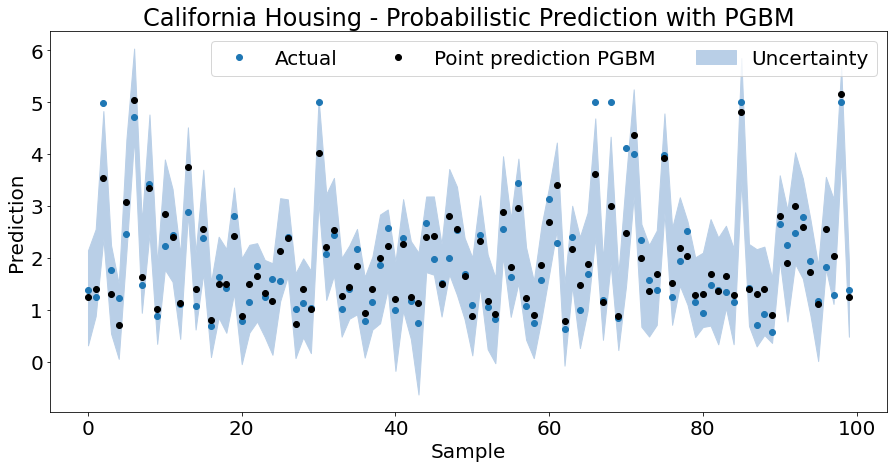

In [6]:
#%% Plot all samples
n_samples_plot = 100
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'figure.figsize':[15, 7]})
plt.plot(y_test[:n_samples_plot], 'o', label='Actual')
plt.plot(yhat_point[:n_samples_plot], 'ko', label='Point prediction PGBM')
plt.fill_between(np.arange(len(y_test[:n_samples_plot])), 
                 yhat_dist.min(0)[:n_samples_plot], 
                 yhat_dist.max(0)[:n_samples_plot], 
                 color="#b9cfe7", label='Uncertainty')
plt.title('California Housing - Probabilistic Prediction with PGBM')
plt.xlabel('Sample')
plt.ylabel('Prediction')
plt.legend(ncol=3)